# Signal Processing

In [1]:
#https://scipy-cookbook.readthedocs.io/index.html

# Interpolation

In [2]:
#SciPy offers several interpolation options for 1,2, and higher dimensions

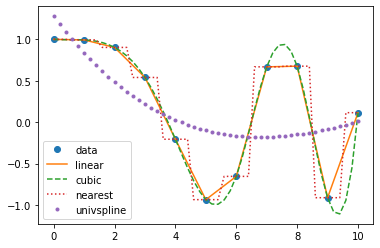

In [21]:
#1-D interpolation ('interp1d')
import numpy as np
#import scipy as sp
from scipy import interpolate
#from scipy.interpolate import interp1d

import matplotlib.pyplot as plt
#%matplotlib inline

x=np.linspace(0,10,num=11,endpoint=True)
y=np.cos(-x**2/9.0)
#f=sp.interpolate.interp1d(x,y) #Default is linear interpolation
#f=interpolate.interp1d(x,y)

f=interpolate.interp1d(x,y)
f2=interpolate.interp1d(x,y,kind='cubic')
#kind (type of interpolation in string or int form, optional)- ‘linear’, ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, 
#‘cubic’, ‘previous’, ‘next’ where 'zero', 'slinear', 'quadratic', and 'cubic' refer spline interplation of zeroth,
#first, second, or third order. These can be written as integer numbers as well.
f3=interpolate.interp1d(x,y,kind='nearest')
spl = interpolate.UnivariateSpline(x,y) #Default spline interpolation (smoothing)
#spl.set_smoothing_factor(0.1) #Manually set the smoothing factor
xnew=np.linspace(0,10,num=51,endpoint=True)
plt.plot(x,y,'o',xnew,f(xnew),'-',xnew,f2(xnew),'--',xnew,f3(xnew),':',xnew,spl(xnew),'.')
plt.legend(['data','linear','cubic','nearest','univspline'],loc='best')
plt.show()

In [4]:
#HW: Extrapolate the data using at least one defined function.

# Smoothing

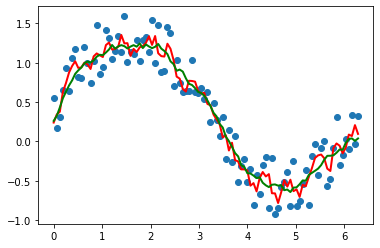

In [25]:
#Moving Avarage, convolution
#https://stackoverflow.com/questions/20618804/how-to-smooth-a-curve-in-the-right-way
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.8

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts #'One' returns a new array of given shape and type, with ones.
    y_smooth = np.convolve(y, box, mode='same') #Returns the discrete, linear convolution of two one-dimensional sequences. 
    return y_smooth

plt.plot(x, y,'o')
plt.plot(x, smooth(y,3), 'r-', lw=2)
plt.plot(x, smooth(y,10), 'g-', lw=2)

In [6]:
#HW: Use other equivalent functions to smooth this data.

In [7]:
#MOVING AVERAGE SMOOTHING
#https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/

            Births
Date              
1959-01-01     NaN
1959-01-02     NaN
1959-01-03     NaN
1959-01-04     NaN
1959-01-05    34.4
1959-01-06    33.2
1959-01-07    35.8
1959-01-08    38.4
1959-01-09    39.8
1959-01-10    36.4


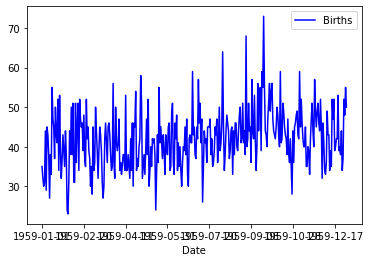

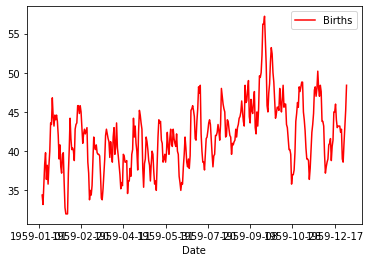

In [29]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('daily-total-female-births.csv', header=0, index_col=0)
# Tail-rolling average transform
rolling = series.rolling(window=5) #Set the window as needed!
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
series.plot(color='blue')
rolling_mean.plot(color='red')
pyplot.show()

In [9]:
#HW: Plot both raw data and smoothed data in the same figure.

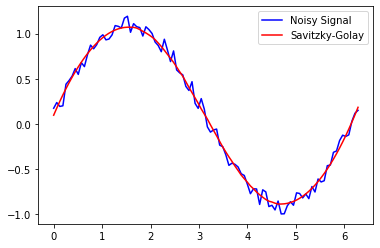

In [31]:
#SMOOTHING FUNCTIONS: Savitzky-Golay
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy import signal

x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.2
xnew = np.linspace(0,2*np.pi,1000)
ysg=signal.savgol_filter(y,51,2) #Window size 51, polynomial order 3
plt.plot(x,y,color='blue')
plt.plot(x,ysg,color='red')
plt.legend(['Noisy Signal','Savitzky-Golay'],loc='best')
plt.show()

In [11]:
#HW: Use Savitzky-Golay filter to smooth a noisy projectile path. (You need to define the projectile path and introduce noise by your self.)

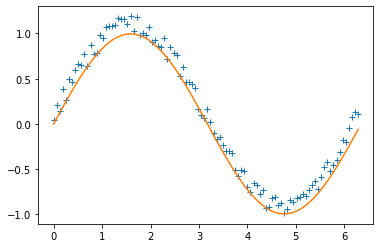

In [32]:
#FFT Filter for smoothing
#https://stackoverflow.com/questions/20618804/how-to-smooth-a-curve-in-the-right-way
import numpy as np
import scipy.fftpack

N = 100
x = np.linspace(0,2*np.pi,N)
y = np.sin(x) + np.random.random(N) * 0.2

w = scipy.fftpack.rfft(y)
f = scipy.fftpack.rfftfreq(N, x[1]-x[0])
spectrum = w**2

cutoff_idx = spectrum < (spectrum.max()/5)
w2 = w.copy()
w2[cutoff_idx] = 0

y2 = scipy.fftpack.irfft(w2)
plt.plot(x, y, '+')
plt.plot(x,y2, '-')
plt.show()

In [13]:
#Note that fft/ifft can also be used to convert signal from time to frequecy domain and vice versa. Try to explore this.

# Curve Fitting

Coefficients: [-42.89583933 -18.88999573   0.14391899]
Intercept: -719.6704599310833


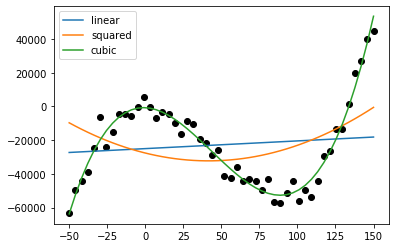

In [33]:
from sklearn.linear_model import LinearRegression

x=np.linspace(-50,150,50)
y=0.15*x**3 - 20*x**2 + 5*x - 4 + 5000*np.random.randn(50)
plt.scatter(x, y, color="black")
model_linear=LinearRegression(fit_intercept=True)
model_squared=LinearRegression(fit_intercept=True)
model_cubic=LinearRegression(fit_intercept=True)
x2=x**2
x3=x**3
model_linear.fit(np.vstack([x]).T, y)
model_squared.fit(np.vstack([x,x2]).T, y)
model_cubic.fit(np.vstack([x,x2,x3]).T, y)
xf=np.linspace(-50,150, 50)
yf_linear=model_linear.predict(np.vstack([x]).T)
yf_squared=model_squared.predict(np.vstack([x,x2]).T)
yf_cubic=model_cubic.predict(np.vstack([x,x2,x3]).T)
plt.plot(xf,yf_linear, label="linear")
plt.plot(xf,yf_squared, label="squared")
plt.plot(xf,yf_cubic, label="cubic")
plt.legend()
print("Coefficients:", model_cubic.coef_)
print("Intercept:", model_cubic.intercept_)

# Homework

HW:1
(i) Generate a sinusoidal waveform using python in range [-2pi, 2pi] such that each data point is separated by at least pi/8.
(ii) Interpolate and extrapolate the curve.
(ii) Introduce a noise (there can be many types of noises, choose the one you think the simplest for you)
(iii) Apply various smoothing techniques and recommend the best for this case.
(iv) Fit an appropriate function and extract relevant parameters such as amplitude of the wavefront, ferquency etc.

HW: 2
(i) Download air pollution monitoring daily data for 2019 from one monitoring station of New York state from https://www.epa.gov/outdoor-air-quality-data/download-daily-data and make a single plot for gases maximum concentration (ppm) versus months for all gases.
(ii) Fit a polynomial or any other relevant function to seek a trend of the data.

# Principal Component Analysis

Steps:
#Standardize the data.
#Use the standardized data to generate a covariance matrix (or perform Singular Vector Decomposition).
#Obtain eigenvectors (principal components) and eigenvalues from the covariance matrix. Each eigenvector will have a corresponding eigenvalue.
#Sort the eigenvalues in descending order.
#Select the k eigenvectors with the largest eigenvalues, where k is the number of dimensions used in the new feature space (k≤d).
#Construct a new matrix with the selected k eigenvectors.

In [15]:
import numpy as np
import math
from sklearn.decomposition import PCA 
#this library features various classification, regression, and clusturing algorithm
#including vector mechanis, random forests, gradient boosting, k-means, and DBSCAN.
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
#Sample data from a distribution, say multi-variate Gaussian distribution for example

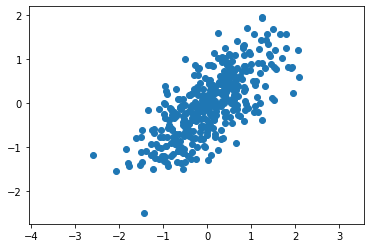

In [17]:
rng=np.random.RandomState(0) #random number derived from variety of probability distributions
X=rng.randn(2,400)
scale=np.array([[1,0],[0,0.4]]) #Standard deviation are 1 and 0.4
rotate=np.array([[1,-1],[1,1]])/math.sqrt(2)
transform=np.dot(rotate,scale) #'dot' returns the dot product of two vectors.
X=np.dot(transform, X)
#X=np.dot(scale,X)
#X=np.dot(rotate,X)
X=X.T
plt.axis('equal')
plt.scatter(X[:,0],X[:,1])

In [18]:
from sklearn.decomposition import PCA
def arrow(v1,v2,ax):
    arrowprops=dict(arrowstyle='->',linewidth=2,shrinkA=0,shrinkB=0)
    ax.annotate("",v2,v1,arrowprops=arrowprops)
pca=PCA(2)
pca.fit(X)
print("Principal axes:",pca.components_)
print("Explained variance:",pca.explained_variance_)
print("Mean:",pca.mean_)

Principal axes: [[-0.73072907 -0.68266758]
 [-0.68266758  0.73072907]]
Explained variance: [0.97980663 0.16031015]
Mean: [ 0.01333067 -0.05370929]


Text(0.5, 1.0, 'Transformed')

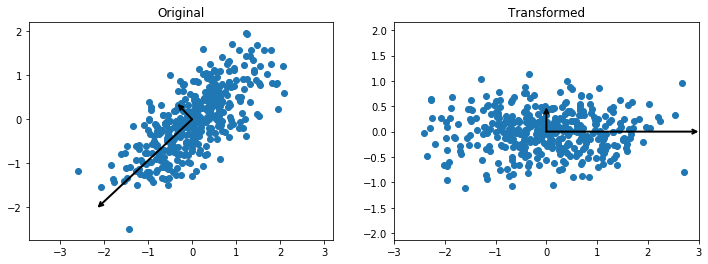

In [19]:
Z=pca.transform(X)
fig, axes = plt.subplots(1,2,figsize=(12,4))
axes[0].axis('equal')
axes[0].scatter(X[:,0],X[:,1])
axes[1].axis('equal')
axes[1].set_xlim(-3,3)
axes[1].scatter(Z[:,0],Z[:,1])
for l,v in zip(pca.explained_variance_, pca.components_):
    arrow([0,0],v*l*3,axes[0])
for l,v in zip([1.0,0.16],[np.array([1.0,0.0]),np.array([0.0,1.0])]):
    arrow([0,0],v*l*3,axes[1])
axes[0].set_title("Original")
axes[1].set_title("Transformed")

[[-0.73072907 -0.68266758]]


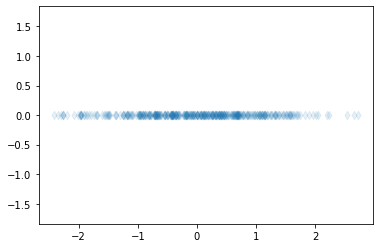

In [20]:
pca=PCA(n_components=1)
pca.fit(X)
Z=pca.transform(X)
print(pca.components_)
plt.axis('equal')
plt.scatter(Z[:,0],np.zeros(400),marker='d',alpha=0.1)